## Global Setting

In [1]:
import torch
import numpy as np

# True if you want to get dynamic output in notebook block, else False
SHOW_PLOT_IN_BLOCK = True

GLOBAL_SEED = 42
CIFAR_PTAH = '../data/'

BATCH_SIZE = 32
LEARNING_RATE = 1e-3
MAX_EPOCHS = 150
EVAL_FREQ = 1
OPTIMIZER = 'SGD'

np.random.seed(GLOBAL_SEED)
torch.manual_seed(GLOBAL_SEED)
torch.cuda.manual_seed_all(GLOBAL_SEED)

## Task 3

### Define Util Functions


In [2]:
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt


def save_fig_acc(eval_epochs, train_acc, test_acc, train_loss, test_loss, file_name, show=SHOW_PLOT_IN_BLOCK):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(eval_epochs, train_acc, label='CIFAR10 Train Acc')
    plt.plot(eval_epochs, test_acc, label='CIFAR10 Test Acc')
    plt.title(f'{file_name} Training Accuracy')
    plt.xlabel('Step')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(eval_epochs, train_loss, label='CIFAR10 Train Loss')
    plt.plot(eval_epochs, test_loss, label='CIFAR10 Test Loss')
    plt.title(f'{file_name} Testing Accuracy')
    plt.xlabel('Step')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()

    path = '../Report/img/Part1/' + file_name + '.png'
    plt.savefig(path)
    if show:
        plt.show()
    plt.close()


def get_data():
    train_set = torchvision.datasets.CIFAR10(root=CIFAR_PTAH, train=True, download=True)
    train_mean = train_set.data.mean(axis=(0, 1, 2)) / 255
    train_std = train_set.data.std(axis=(0, 1, 2)) / 255

    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(train_mean, train_std)
    ])

    train_data = torchvision.datasets.CIFAR10(root=CIFAR_PTAH, train=True,
                                              download=True, transform=transform)

    test_data = torchvision.datasets.CIFAR10(root=CIFAR_PTAH, train=False,
                                             download=True, transform=transform)

    train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)
    return train_loader, test_loader

### Train Model


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 5/5 [01:30<00:00, 18.05s/it]


After 5 Epochs: 
Train Acc: 56.2840%, Test Acc: 53.2800%
Train Loss: 1.249183, Test Loss: 1.339596


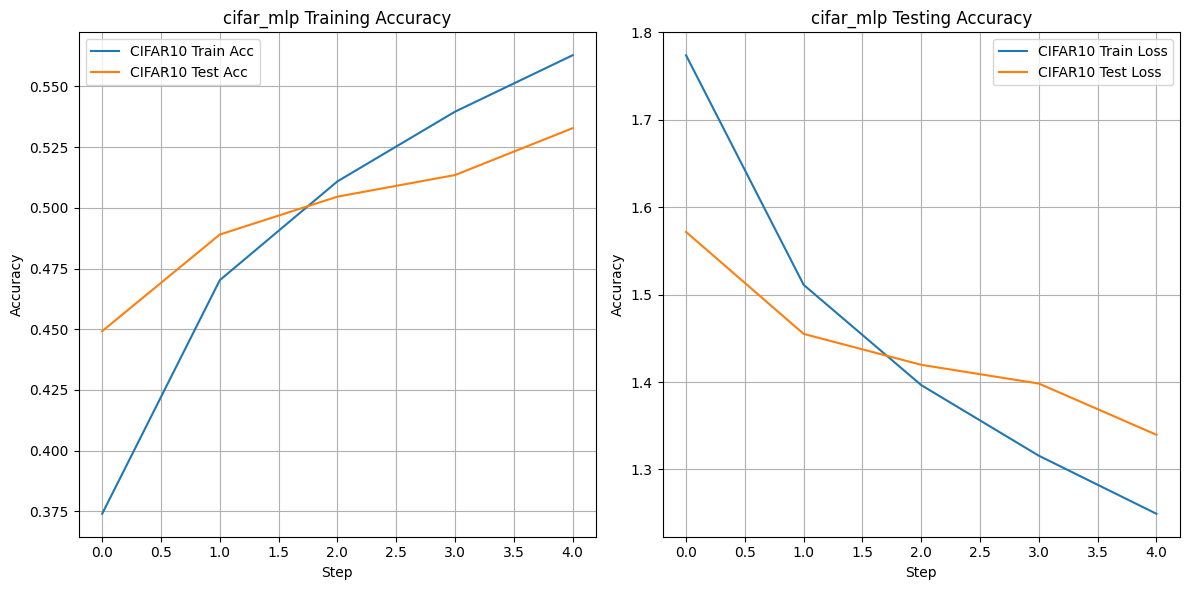

In [4]:
import pytorch_cifar

train_loader, test_loader = get_data()

eval_epochs, train_acc, test_acc, train_loss, test_loss = (
    pytorch_cifar.train(train_loader, test_loader,
                        learning_rate=LEARNING_RATE,
                        max_epoch=150,
                        eval_freq=EVAL_FREQ,
                        optimizer_type='SGD',
                        )
)

file_name = f'cifar_mlp'
save_fig_acc(eval_epochs, train_acc, test_acc, train_loss, test_loss, file_name=file_name)

## Static Show Images

### Adam Optimizer

![cifar_mlp_b32_adam](../Report/img/Part1/cifar_mlp_b32_adam.png)



### SGD Optimizer

![cifar_mlp_b32_sgd](../Report/img/Part1/cifar_mlp_b32_sgd.png)

